# Power Plant Dataset

## Shifa Shaikh
### EE257 
#### HW#2




# Problem: 4

# a)
Download the dataset

# b)
## Description of the dataset.

The dataset contains the 9568 datapoints that are collected from a Combined Cycle Power Plant when it was operated with full-load. It is the real-time data recorded in the years 2006 to 2011. It has 4 columns with various parameters measured during the production. As the value of Power is a continuous value and can take infinite values, this problem is a regression problem. The main idea is to develop a machine learning regression predictive model, which can predict hourly full load electrical power output of a combined cycle power plant. The base load operation of a power plant is influenced by four main parameters, which are used as input variables in the dataset, such as ambient temperature, atmospheric pressure, relative humidity, and exhaust steam pressure. 

In [ ]:
# Import the library

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Download the data and read the sheets using pandas library

plant = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Machine Learning/HW#1/Folds5x2_pp.xlsx", sheet_name=0)

In [ ]:
# Checking the first five rows in the dataset

print("Sheet-1")
plant.head()

Sheet-1


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [ ]:
# Studying the statistical values for every column to check if there are any outliers or missing values in the dataset
plant.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
# Datatypes of different columns
plant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [ ]:
# taking input variable x
AT_x = np.c_[np.ones((9568,1)), plant["AT"].values]
AT_x

array([[ 1.  , 14.96],
       [ 1.  , 25.18],
       [ 1.  ,  5.11],
       ...,
       [ 1.  , 31.32],
       [ 1.  , 24.48],
       [ 1.  , 21.6 ]])

In [ ]:
# taking output variable y
PE_y = plant["PE"]
print(PE_y)
print("Shape of PE is: ", PE_y.shape)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64
Shape of PE is:  (9568,)


In [ ]:
# reshape it to form an array into a vector
PE_y = PE_y.values.reshape(9568,1)

In [ ]:
# checking the final shape of the vector
PE_y.shape

(9568, 1)

In [ ]:
# Normal Equation for Linear Regression
beta = np.linalg.inv((AT_x.T).dot(AT_x)).dot(AT_x.T).dot(PE_y)
print("Beta using Normal Equations: \n", beta)

Beta using Normal Equations: 
 [[497.03411989]
 [ -2.17131996]]


# c)
 Plot PE vs AT and Simple Linear Regression on same figure

<function matplotlib.pyplot.show>

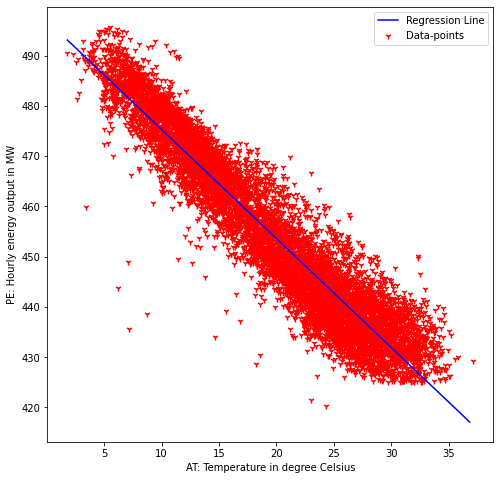

In [ ]:
%matplotlib inline
x = np.arange(np.min(plant["AT"]), np.max(plant["AT"]))
y = beta[0,0] + x * beta[1,0]
plt.figure(figsize=(8,8))
plt.plot(x, y, color = 'b', label="Regression Line")
plt.scatter(plant["AT"].values, plant["PE"].values, color= 'r', marker="1", label="Data-points")
plt.xlabel("AT: Temperature in degree Celsius")
plt.ylabel("PE: Hourly energy output in MW")
plt.legend()
plt.show

# d) 
Use OLS from statmodels.api library to obtain a table

In [ ]:
import statsmodels.formula.api as sm
model = sm.ols("PE ~ AT", plant)
result = model.fit()
print(result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:47:11   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

# e) 


*   Is there a relationship between the predictor and the response?
Yes, there is relationship between the predictor and the response from graph c and table d. As the temperature increases the Power output decreases. 

*   How strong is the relationship between the predictor and the response?
The relationship is negatively stronger. 

*   Is the relationship between the predictor and the response positive or
negative?
The relationship is negative. 






# f)
Repeat part-c, part-d, and part-e for the rest of the input variables (AP, V, RH) 

## PE vs V

In [ ]:
V_x = np.c_[np.ones((9568,1)), plant["V"].values]
V_x

array([[ 1.  , 41.76],
       [ 1.  , 62.96],
       [ 1.  , 39.4 ],
       ...,
       [ 1.  , 74.33],
       [ 1.  , 69.45],
       [ 1.  , 62.52]])

In [ ]:
beta = np.linalg.inv((V_x.T).dot(V_x)).dot(V_x.T).dot(PE_y)
print("Beta using Normal Equations: \n", beta)

Beta using Normal Equations: 
 [[517.80152631]
 [ -1.16813513]]


<function matplotlib.pyplot.show>

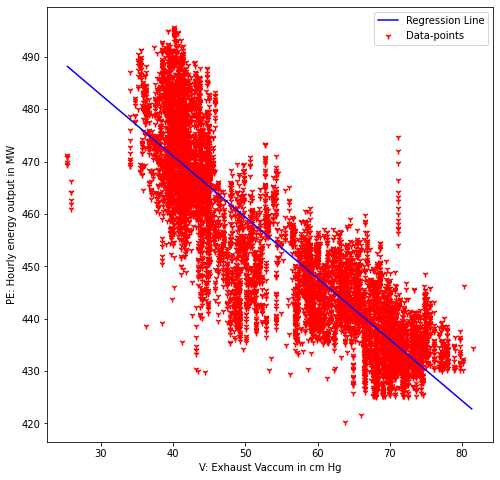

In [ ]:
%matplotlib inline
x = np.arange(np.min(plant["V"]), np.max(plant["V"]))
y = beta[0,0] + x * beta[1,0]
plt.figure(figsize=(8,8))
plt.plot(x, y, color = 'b', label="Regression Line")
plt.scatter(plant["V"].values, plant["PE"].values, color= 'r', marker="1", label="Data-points")
plt.xlabel("V: Exhaust Vaccum in cm Hg")
plt.ylabel("PE: Hourly energy output in MW")
plt.legend()
plt.show

In [ ]:
model = sm.ols("PE ~ V", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:47:12   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

* Is there a relationship between the predictor and the response?
Yes, there is a relationship

* How strong is the relationship between the predictor and the response?
As vaccume increases the Power decrease gradually. The relationship is stronger.

* Is the relationship between the predictor and the response positive or negative?
The relationship is negative. 



# PE vs AP

In [ ]:
AP_x = np.c_[np.ones((9568,1)), plant["AP"].values]
AP_x

array([[1.00000e+00, 1.02407e+03],
       [1.00000e+00, 1.02004e+03],
       [1.00000e+00, 1.01216e+03],
       ...,
       [1.00000e+00, 1.01292e+03],
       [1.00000e+00, 1.01386e+03],
       [1.00000e+00, 1.01723e+03]])

In [ ]:
beta = np.linalg.inv((AP_x.T).dot(AP_x)).dot(AP_x.T).dot(PE_y)
print("Beta using Normal Equations: \n", beta)

Beta using Normal Equations: 
 [[-1055.26098898]
 [    1.48987167]]


<function matplotlib.pyplot.show>

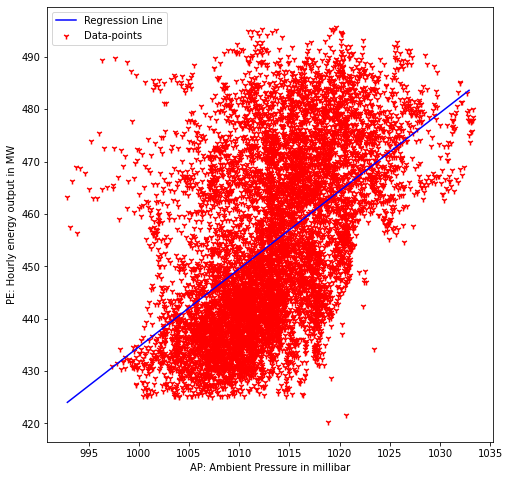

In [ ]:
%matplotlib inline
x = np.arange(np.min(plant["AP"]), np.max(plant["AP"]))
y = beta[0,0] + x * beta[1,0]
plt.figure(figsize=(8,8))
plt.plot(x, y, color = 'b', label="Regression Line")
plt.scatter(plant["AP"].values, plant["PE"].values, color= 'r', marker="1", label="Data-points")
plt.xlabel("AP: Ambient Pressure in millibar")
plt.ylabel("PE: Hourly energy output in MW")
plt.legend()
plt.show

In [ ]:
model = sm.ols("PE ~ AP", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:47:12   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

* Is there a relationship between the predictor and the response?
Yes. 

* How strong is the relationship between the predictor and the response?
Very strong.

* Is the relationship between the predictor and the response positive or negative?
Positive relationship



# PE vs RH

In [ ]:
RH_x = np.c_[np.ones((9568,1)), plant["RH"].values]
RH_x

array([[ 1.  , 73.17],
       [ 1.  , 59.08],
       [ 1.  , 92.14],
       ...,
       [ 1.  , 36.48],
       [ 1.  , 62.39],
       [ 1.  , 67.87]])

In [ ]:
beta = np.linalg.inv((RH_x.T).dot(RH_x)).dot(RH_x.T).dot(PE_y)
print("Beta using Normal Equations: \n", beta)

Beta using Normal Equations: 
 [[420.96176616]
 [  0.4556501 ]]


<function matplotlib.pyplot.show>

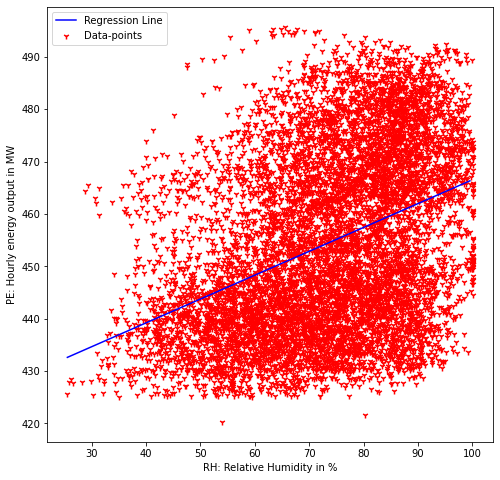

In [ ]:
%matplotlib inline
x = np.arange(np.min(plant["RH"]), np.max(plant["RH"]))
y = beta[0,0] + x * beta[1,0]
plt.figure(figsize=(8,8))
plt.plot(x, y, color = 'b', label="Regression Line")
plt.scatter(plant["RH"].values, plant["PE"].values, color= 'r', marker="1", label="Data-points")
plt.xlabel("RH: Relative Humidity in %")
plt.ylabel("PE: Hourly energy output in MW")
plt.legend()
plt.show

In [ ]:
model = sm.ols("PE ~ RH", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:47:13   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

* Is there a relationship between the predictor and the response?
Yes.

* How strong is the relationship between the predictor and the response?
Stronger

* Is the relationship between the predictor and the response positive or negative?
Positive



# g )
Use all four input variables and OLS from statmodels.api library

In [ ]:
model = sm.ols("PE ~ AT + V + AP + RH", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:47:13   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

* Which predictors appear to have a statistically significant relationship to
the response?
AP seems to have siginificant relationship to the response. 

* What does the coefficient for the AT variable suggest?
It has a higher negative relationship that cannot be ignored. 

# h)
Use all four input variables and create new nonlinear features

In [ ]:
plant["AT_V"] = plant.AT * plant.V

In [ ]:
plant.head()

,AT,V,AP,RH,PE,AT_V
0,14.96,41.76,1024.07,73.17,463.26,624.7296
1,25.18,62.96,1020.04,59.08,444.37,1585.3328
2,5.11,39.40,1012.16,92.14,488.56,201.3340
3,20.86,57.32,1010.24,76.64,446.48,1195.6952
4,10.82,37.50,1009.23,96.62,473.90,405.7500


In [ ]:
model = sm.ols("PE ~ AT + V + AP + RH + AT_V", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                 2.741e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        00:50:09   Log-Likelihood:                -27662.
No. Observations:                9568   AIC:                         5.534e+04
Df Residuals:                    9562   BIC:                         5.538e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    444.1431      9.331     47.598      0.0

In [ ]:
plant["AP_RH"] = plant.AP * plant.RH

In [ ]:
plant.head()

,AT,V,AP,RH,PE,AT_V,AP_RH
0,14.96,41.76,1024.07,73.17,463.26,624.7296,74931.2019
1,25.18,62.96,1020.04,59.08,444.37,1585.3328,60263.9632
2,5.11,39.40,1012.16,92.14,488.56,201.3340,93260.4224
3,20.86,57.32,1010.24,76.64,446.48,1195.6952,77424.7936
4,10.82,37.50,1009.23,96.62,473.90,405.7500,97511.8026


In [ ]:
plant.drop(["AT_V"], axis=1)

,AT,V,AP,RH,PE,AP_RH
0,14.96,41.76,1024.07,73.17,463.26,74931.2019
1,25.18,62.96,1020.04,59.08,444.37,60263.9632
2,5.11,39.40,1012.16,92.14,488.56,93260.4224
3,20.86,57.32,1010.24,76.64,446.48,77424.7936
4,10.82,37.50,1009.23,96.62,473.90,97511.8026
...,...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03,92274.9100
9564,13.19,39.18,1023.67,66.78,469.62,68360.6826
9565,31.32,74.33,1012.92,36.48,429.57,36951.3216
9566,24.48,69.45,1013.86,62.39,435.74,63254.7254


In [ ]:
model = sm.ols("PE ~ AT + V + AP + RH + AP_RH", plant)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.497e+04
Date:                Thu, 04 Mar 2021   Prob (F-statistic):               0.00
Time:                        01:52:47   Log-Likelihood:                -28077.
No. Observations:                9568   AIC:                         5.617e+04
Df Residuals:                    9562   BIC:                         5.621e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    662.1939     45.893     14.429      0.0

The relationship when we multiply Temperature and Vaccum is positive. Also, it has significantly high t-statistics so that means the problem has some non-linearity. The coefficients of AT and V decreased gradually when introduced a non-linear feature. Also, the t-statistics for both increased. 
For other model, AP_RH the coefficient is smaller but the t value is higher. So, there is some non-linear behavior in our dataset.  

# i)
correlation coefficients for Power Plant Dataset

In [ ]:
corr_matrix = plant.corr()
print(corr_matrix)

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


# Problem:5
The Turing Test is named after the researcher Alan Turing. He argues that the computers can have thinking abilities. He tests a game called Imitation game on humans. The game has 3 players one male, one female and one interpreter. Both the players tries to convince the interpreter that they are of opposite gender. They have to manipulate the interpreter in order to make him believe that the person is male if she is a female or vice verse. Similarly, Alan beleives that, one can build a machine or a computer having the same abilities that can think of ways to act like another person/machine just to make the interpreter recognize it as a wrong machine. This test came to be known as Turing's Test.